# Module Three Problem Set: Second Order Regression Models

In this notebook, you have been given a set of steps that will show you how to create a multiple regression model in R. It is very important to run the steps in order. Some steps depend on the outputs of earlier steps. Once you have run all the steps, you will be asked to create your own multiple regression model to help you answer the questions in Module Three the Problem Set. You are expected to write the R script yourself to answer these questions.

Reminder: If you have not already reviewed the Problem Set Report template for your Module Three Problem Set, be sure to do so now. That will give you an idea of the questions you will need to answer with the outputs of this script. You should use the code you are given as reference when writing your own scripts.


### Step 1: Loading the Data Set

You are an analyst working for the government and you have access to a set of historical data that can be used to study wage growth of the labor force. Governments are interested in studying wage growth patterns based on their economic agenda. This data set has other economic factors that are related to wage growth. You will use this data set to create models for wage growth.

This block of R code will load the **economic** data set from a CSV file. It will then display the first six rows of the data. Here are the variables contained in the data set:

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> wage_growth </div> | <div style="text-align: left"> Wage growth rate </div> |
| <div style="text-align: left"> inflation </div> | <div style="text-align: left"> Rate of inflation </div> |
| <div style="text-align: left"> unemployment </div> | <div style="text-align: left"> Unemployment rate</div> |
| <div style="text-align: left"> economy </div> | <div style="text-align: left"> Economy in recession or not in recession </div> |
| <div style="text-align: left"> gdp </div> | <div style="text-align: left"> GDP growth rate </div> |

Note: This is a simulated data set based on a real-world problem.

Click the code section below and hit the **Run** button above.

In [1]:
economic <- read.csv(file='economic.csv', header=TRUE, sep=",")

# Print the first six rows
print("head")
head(economic, 6)

[1] "head"


wage_growth,inflation,unemployment,economy,education,gdp
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
7.30,4.49,3.56,no_recession,college,6.27
9.05,9.59,2.42,no_recession,college,9.44
10.08,11.36,1.23,no_recession,post_graduate,18.29
10.98,9.55,1.18,no_recession,post_graduate,19.96
8.54,8.63,2.54,no_recession,high_school,8.43
9.75,8.26,2.22,no_recession,college,17.85


## Step 2: Scatterplot of Wage Growth and GDP Growth
In this step, you will use the **plot** function in R to print the scatterplot for variables **wage_growth** and **gdp** in the data set.  


Click the block of code below and hit the **Run** button above.  
NOTE: If the plot is not created, click the code section and hit the **Run** button again.

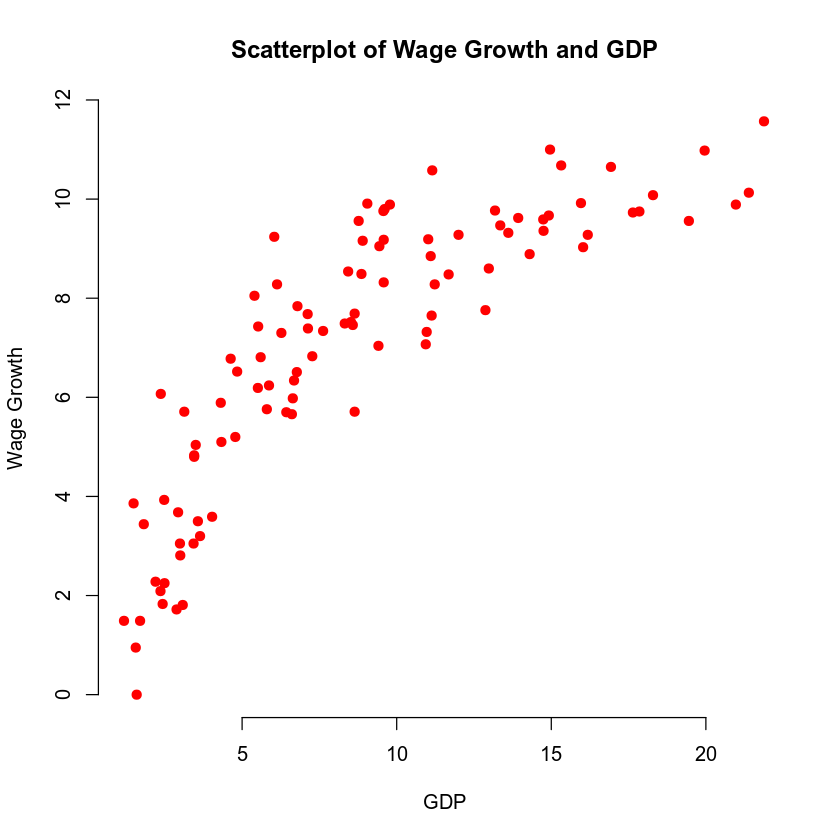

In [2]:
plot(economic$gdp, economic$wage_growth, 
     main = "Scatterplot of Wage Growth and GDP",
     xlab = "GDP", ylab = "Wage Growth",
     col="red", 
     pch = 19, frame = FALSE)

## Step 3: Scatterplot of Wage Growth and Unemployment Rate
In this step, you will use the **plot** function in R to print the scatterplot for variables **wage_growth** and **unemployment** in the data set.  


Click the block of code below and hit the **Run** button above.  
NOTE: If the plot is not created, click the code section and hit the **Run** button again.

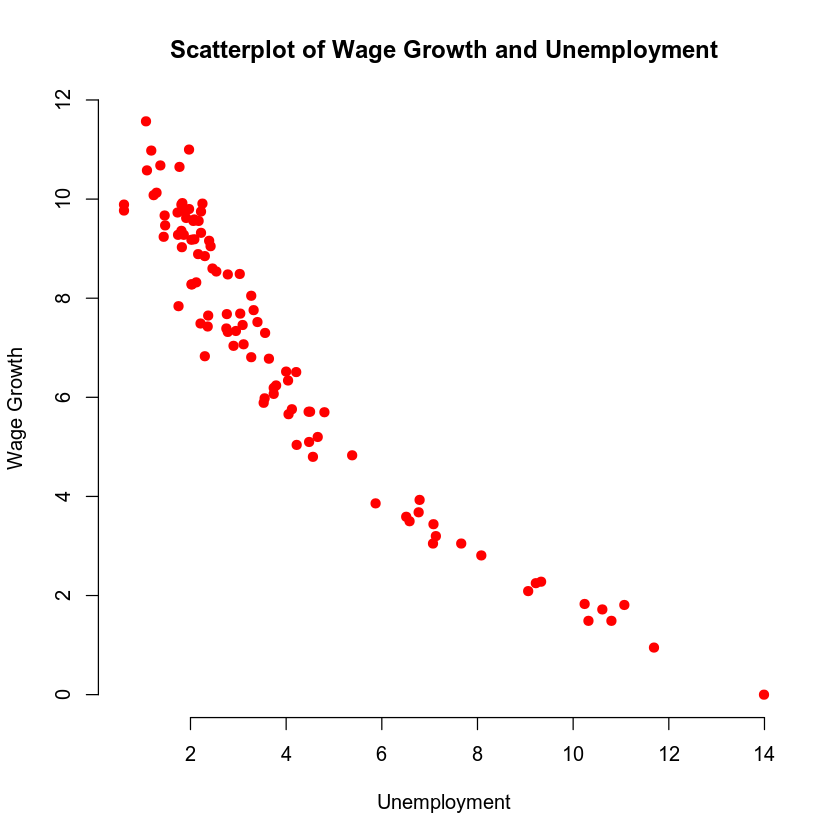

In [3]:
plot(economic$unemployment, economic$wage_growth, 
     main = "Scatterplot of Wage Growth and Unemployment",
     xlab = "Unemployment", ylab = "Wage Growth",
     col="red", 
     pch = 19, frame = FALSE)

## Step 4: Quadratic (Second Order) Model with One Quantitative Variable
In this step, you will create a second order multiple regression model for **wage_growth** as the response variable and **gdp** as the predictor variable. The general form of this second order regression model is:
<br><br>
\begin{equation*}
\large E(Y) = {\beta}_0 +\ {\beta}_1\ {x} +\ {\beta}_2\ {x}^2
\end{equation*}
<br><br>

\begin{equation*}
\text{where y is wage growth and}\ {x}\ \text{is GDP growth} 
\end{equation*}

<br>

The following code block will create this second order model. 

Click the block of code below and hit the **Run** button above.  

In [5]:
# Create the second order regression model and print the statistics
model1 <- lm(wage_growth ~ gdp + I(gdp^2), data=economic)
summary(model1)


Call:
lm(formula = wage_growth ~ gdp + I(gdp^2), data = economic)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4028 -0.8161 -0.2157  0.7948  2.9852 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.713275   0.365647   1.951    0.054 .  
gdp          1.114431   0.082167  13.563  < 2e-16 ***
I(gdp^2)    -0.032609   0.003843  -8.485 2.64e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.147 on 96 degrees of freedom
Multiple R-squared:  0.8338,	Adjusted R-squared:  0.8303 
F-statistic: 240.7 on 2 and 96 DF,  p-value: < 2.2e-16


### Interpretation of Beta Estimates
Suppose the regression model is:
<br><br>
\begin{equation*}
\large E(y) = 0.7133\ +\ 1.1144\ {x} -\ 0.0326\ {x}^2
\end{equation*}
<br><br>

* Note that the estimated coefficient of term x is 1.1144. In the presence of the squared term (x^2), it no longer represents a slope coefficient. The estimated coefficient of x does not have a meaningful interpretation. 
<br><br>
* The estimated coefficient of term x^2 is -0.0326. Since the sign of this coefficient is "-" (negative), it indicates a curve with downward concavity. This confirms the relationship observed in step 2. A "+" (positive) sign for the estimate would indicate a curve relationship that has upward concavity. Thus, the estimated coefficient of term x^2 represents the rate of curvature.


## Step 5: Prediction, Prediction Interval, and Confidence Interval
In this step, you will predict the wage growth when the GDP is growing at 1.70%. You will also obtain a 90% prediction interval and confidence interval for this prediction. Note that this observation is not from the data set that was used to create this model. 

Click the block of code below and hit the **Run** button above.  

In [6]:
newdata <- data.frame(gdp=1.70)

print("prediction interval")
prediction_pred_int <- predict(model1, newdata, interval="predict", level=0.90) 
round(prediction_pred_int,4)

print("confidence interval")
prediction_conf_int <- predict(model1, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int,4)

[1] "prediction interval"


fit,lwr,upr
2.5136,0.5625,4.4646


[1] "confidence interval"


fit,lwr,upr
2.5136,2.092,2.9351


## Step 6: Complete Second Order Model (Two Quantitative Variables)
In this step, you will create a second order multiple regression model for **wage_growth** as the response variable and **unemployment** and **gdp** as predictor variables. A complete second order model contains all of the terms in a first order model, as well as interaction terms, and second order terms involving squares for only the quantitative independent variables. 

<br><br>

\begin{equation*}
\large E(Y) = {\beta}_0\ +\ {\beta}_1\ {x}_1\ +\  {\beta}_2\ {x}_2\ +\ {\beta}_3\ {x}_1{x}_2 + \ {\beta}_4\ {x}_1^2\ +\ {\beta}_5\ {x}_2^2\ 
\end{equation*}

<br>
\begin{equation*}
\text{where y is wage growth,}\ {x}_1\ \text{is unemployment, and}\ {x}_2\ \text{is GDP growth} 
\end{equation*}

<br><br>

The following code block will create this complete second order model. 

Click the block of code below and hit the **Run** button above.  

In [7]:
# Create the second order regression model and print the statistics
model2 <- lm(wage_growth ~ unemployment + gdp + unemployment:gdp + I(unemployment^2) + I(gdp^2) , data=economic)
summary(model2)


Call:
lm(formula = wage_growth ~ unemployment + gdp + unemployment:gdp + 
    I(unemployment^2) + I(gdp^2), data = economic)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.37686 -0.35318  0.01594  0.33860  1.55345 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.989434   1.014702   8.859 5.30e-14 ***
unemployment      -1.152823   0.244170  -4.721 8.26e-06 ***
gdp                0.283691   0.140811   2.015  0.04682 *  
I(unemployment^2)  0.037685   0.013069   2.884  0.00489 ** 
I(gdp^2)          -0.006599   0.004299  -1.535  0.12815    
unemployment:gdp  -0.006282   0.021119  -0.297  0.76678    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5807 on 93 degrees of freedom
Multiple R-squared:  0.9587,	Adjusted R-squared:  0.9565 
F-statistic:   432 on 5 and 93 DF,  p-value: < 2.2e-16


## Step 7: Prediction, Prediction Interval, and Confidence Interval
In this step, you will predict the wage growth when the unemployment rate is 8.09% and the GDP is growing at 1.70%. You will also obtain a 90% prediction interval and confidence interval for this prediction. Note that this observation is not from the data set that was used to create this model. 

Click the block of code below and hit the **Run** button above.  

In [8]:
newdata <- data.frame(unemployment=8.09, gdp=1.70)

print("prediction interval")
prediction_pred_int <- predict(model2, newdata, interval="predict", level=0.90) 
round(prediction_pred_int,4)

print("confidence interval")
prediction_conf_int <- predict(model2, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int,4)

[1] "prediction interval"


fit,lwr,upr
2.5063,1.4942,3.5185


[1] "confidence interval"


fit,lwr,upr
2.5063,2.2004,2.8123


## Step 8: Complete Second Order Model (One Quantitative and One Qualitative Variable)
In this step, you will create a second order multiple regression model for **wage_growth** as the response variable and **unemployment**, **economy** as predictor variables. A complete second order model contains all of the terms in a first order model, second order terms involving squares of only the quantitative independent variables, and interaction terms. 

<br><br>

\begin{equation*}
\large E(Y) = {\beta}_0\ +\ {\beta}_1\ {x}_1\ +\  {\beta}_2\ {x}_2\ +\ {\beta}_3\ {x}_1\ {x}_2\ +\ {\beta}_4\ {x}_1^2\ +\ {\beta}_5\ {x}_1^2\ {x}_2
\end{equation*}

<br>
\begin{equation*}
\text{where y is wage growth,}\ {x}_1\ \text{is unemployment, and}\ {x}_2\ \text{is economy} 
\end{equation*}
<br>

The following code block will create this complete second-order model. 

Click the block of code below and hit the **Run** button above.  

In [9]:
# Create the second order regression model and print the statistics
model3 <- lm(wage_growth ~ unemployment + economy + unemployment:economy + I(unemployment^2) + I(unemployment^2):economy, data=economic)
summary(model3)


Call:
lm(formula = wage_growth ~ unemployment + economy + unemployment:economy + 
    I(unemployment^2) + I(unemployment^2):economy, data = economic)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77220 -0.35522  0.04877  0.42602  1.90778 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        12.36072    0.27055  45.687  < 2e-16 ***
unemployment                       -1.80834    0.14236 -12.703  < 2e-16 ***
economyrecession                   -2.70404    1.08221  -2.499   0.0142 *  
I(unemployment^2)                   0.07574    0.01460   5.188 1.24e-06 ***
unemployment:economyrecession       0.69359    0.30901   2.245   0.0272 *  
economyrecession:I(unemployment^2) -0.04358    0.02206  -1.976   0.0512 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6551 on 93 degrees of freedom
Multiple R-squared:  0.9475,	Adjusted R-squared:  0.9446 
F-statistic: 33

## Step 9: Prediction, Prediction Interval, and Confidence Interval
In this step, you will predict the wage growth when the unemployment rate is 8.09% and the economy is in recession. You will also obtain a 90% prediction interval and confidence interval for this prediction. Note that this observation is not from the data set that was used to create this model. 

Click the block of code below and hit the **Run** button above.  

In [10]:
newdata <- data.frame(unemployment=8.09, economy='recession')

print("prediction interval")
prediction_pred_int <- predict(model3, newdata, interval="predict", level=0.90) 
round(prediction_pred_int,4)

print("confidence interval")
prediction_conf_int <- predict(model3, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int,4)

[1] "prediction interval"


fit,lwr,upr
2.7431,1.6076,3.8785


[1] "confidence interval"


fit,lwr,upr
2.7431,2.4196,3.0665


## Your Code

You have been asked to create regression models in the Module Three Problem Set. Review the Problem Set Report template to see the questions you will be answering about your models.

Use the empty blocks below to write the R code for your models and get outputs. Then use the outputs to answer the questions in your problem set report.

**Note: Use the + (plus) button to add new code blocks or the scissor icon to remove empty code blocks, if needed.**

In [1]:
economic <- read.csv(file='economic.csv', header=TRUE, sep=",")

head(economic, 6)

wage_growth,inflation,unemployment,economy,education,gdp
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
7.30,4.49,3.56,no_recession,college,6.27
9.05,9.59,2.42,no_recession,college,9.44
10.08,11.36,1.23,no_recession,post_graduate,18.29
10.98,9.55,1.18,no_recession,post_graduate,19.96
8.54,8.63,2.54,no_recession,high_school,8.43
9.75,8.26,2.22,no_recession,college,17.85


In [2]:
print("Rows")
nrow(economic)

print("Columns")
ncol(economic)

[1] "Rows"


[1] 99

[1] "Columns"


[1] 6

<b> SCATTERPLOT - WAGE GROWTH & INFLATION</b>

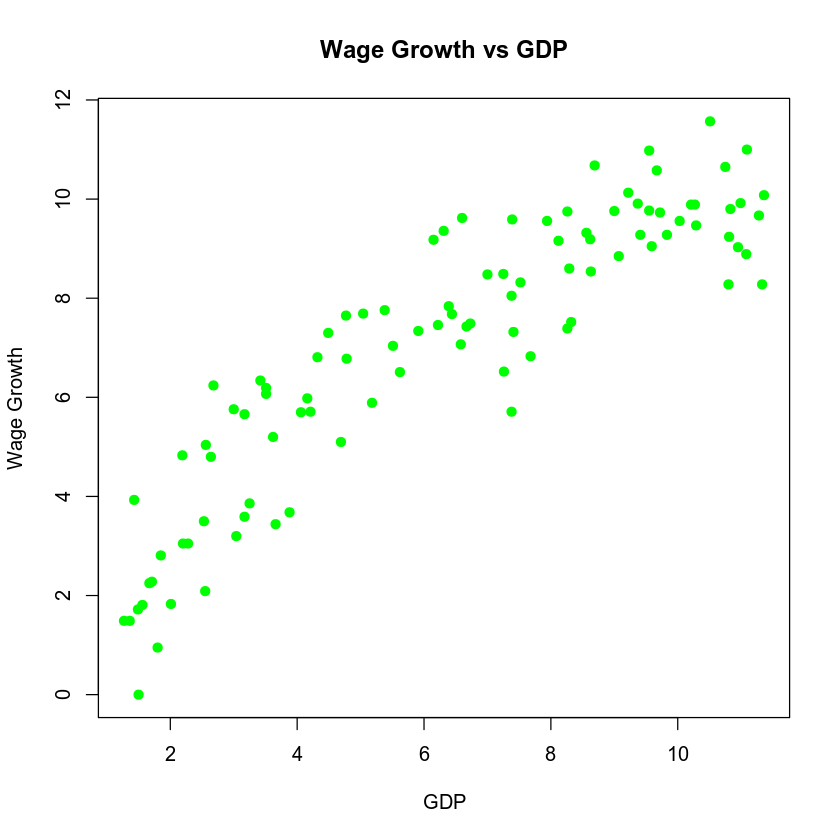

In [3]:
plot(economic$inflation, economic$wage_growth, 
     main = "Wage Growth vs GDP",
     xlab = "GDP", ylab = "Wage Growth",
     col="green", 
     pch = 19, frame = TRUE)

<b>SECOND ORDER MODEL OF WAGE GROWTH VS INFLATION</b>

In [4]:
model1 <- lm(wage_growth ~ inflation + I(inflation^2), data=economic)
summary(model1)


Call:
lm(formula = wage_growth ~ inflation + I(inflation^2), data = economic)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.83091 -0.62783 -0.02893  0.75316  2.36608 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.39508    0.44836  -0.881     0.38    
inflation       1.81077    0.16532  10.953  < 2e-16 ***
I(inflation^2) -0.08129    0.01289  -6.304 8.81e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.047 on 96 degrees of freedom
Multiple R-squared:  0.8614,	Adjusted R-squared:  0.8585 
F-statistic: 298.2 on 2 and 96 DF,  p-value: < 2.2e-16


<b>PREDICTION AND CONFIDENCE INTERVALS</b>

In [5]:
newdata <- data.frame(inflation=7.41)

print("prediction interval")
prediction_pred_int <- predict(model1, newdata, interval="predict", level=0.95) 
round(prediction_pred_int,4)

print("confidence interval")
prediction_conf_int <- predict(model1, newdata, interval="confidence", level=0.95) 
round(prediction_conf_int,4)

[1] "prediction interval"


fit,lwr,upr
8.5592,6.4568,10.6616


[1] "confidence interval"


fit,lwr,upr
8.5592,8.2473,8.871


<b>MODEL 2 - SECOND ORDER MODEL with WAGE GROWTH GDP and INFLATION</b>

In [6]:
model2 <- lm(wage_growth ~ inflation + gdp + inflation:gdp + I(inflation^2) + I(gdp^2) , data=economic)
summary(model2)


Call:
lm(formula = wage_growth ~ inflation + gdp + inflation:gdp + 
    I(inflation^2) + I(gdp^2), data = economic)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.51590 -0.55715 -0.08018  0.62653  2.09057 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.395208   0.365361  -1.082   0.2822    
inflation       1.060687   0.195710   5.420 4.68e-07 ***
gdp             0.545357   0.110379   4.941 3.42e-06 ***
I(inflation^2) -0.027371   0.019822  -1.381   0.1706    
I(gdp^2)       -0.003176   0.005775  -0.550   0.5837    
inflation:gdp  -0.034358   0.017778  -1.933   0.0563 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8512 on 93 degrees of freedom
Multiple R-squared:  0.9113,	Adjusted R-squared:  0.9065 
F-statistic: 191.1 on 5 and 93 DF,  p-value: < 2.2e-16


<b>PREDICTION AND CONFIDENCE INTERVALS</b>

In [7]:
newdata <- data.frame(inflation = 7.41, gdp = 9.59)

print("prediction interval")
prediction_pred_int <- predict(model2, newdata, interval = "predict", level = 0.95) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(model2, newdata, interval = "confidence", level = 0.95) 
round(prediction_conf_int, 4)

[1] "prediction interval"


fit,lwr,upr
8.4579,6.744,10.1718


[1] "confidence interval"


fit,lwr,upr
8.4579,8.1751,8.7407


<b>MODEL 3 - ONE QUALITATIVE AND ONE QUANTITATIVE</b>

In [8]:
model3 <- lm(wage_growth ~ inflation + economy + inflation:economy + I(inflation^2) + I(inflation^2):economy, data = economic)
summary(model3)


Call:
lm(formula = wage_growth ~ inflation + economy + inflation:economy + 
    I(inflation^2) + I(inflation^2):economy, data = economic)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7108 -0.6342  0.1124  0.7136  1.9368 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      1.38806    0.73653   1.885  0.06261 .  
inflation                        1.33488    0.22565   5.916 5.45e-08 ***
economyrecession                -3.48576    2.14620  -1.624  0.10773    
I(inflation^2)                  -0.05175    0.01598  -3.239  0.00167 ** 
inflation:economyrecession       1.41440    1.64178   0.862  0.39118    
economyrecession:I(inflation^2) -0.16300    0.30307  -0.538  0.59197    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.015 on 93 degrees of freedom
Multiple R-squared:  0.8738,	Adjusted R-squared:  0.867 
F-statistic: 128.7 on 5 and 93 DF,  p-value: < 2.2e-16


In [9]:
newdata <- data.frame(inflation = 7.41, economy = 'no_recession')

print("prediction interval")
prediction_pred_int <- predict(model3, newdata, interval = "predict", level = 0.95) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(model3, newdata, interval = "confidence", level = 0.95) 
round(prediction_conf_int, 4)

[1] "prediction interval"


fit,lwr,upr
8.4379,6.3961,10.4796


[1] "confidence interval"


fit,lwr,upr
8.4379,8.1175,8.7582


## End of Module Three Jupyter Notebook
Attach the HTML output along with your problem set report for the Module Three Problem Set. The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all of the questions in your problem set report.